
Within-class scatter (S_W):
 [[ 2.02347093 -0.20561545  0.13165125]
 [-0.20561545  2.04046348 -0.19696772]
 [ 0.13165125 -0.19696772  2.04823671]]

Fisher LDA projection vector (w_LDA): [0.77549539 0.89368419 0.77131811]


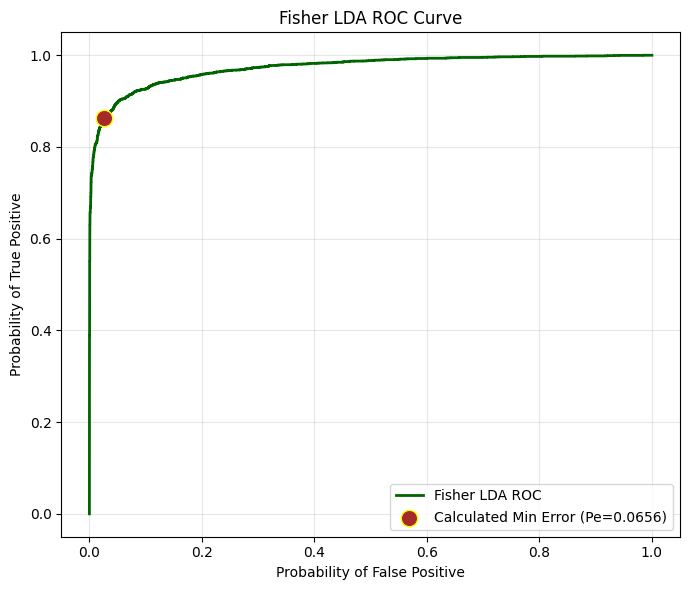


Fisher LDA calculations:
Threshold (tau): 0.6492
FPR: 0.0268
TPR: 0.8624
Min Pe: 0.06558


In [9]:
import numpy as np
import matplotlib.pyplot as plt

p0, p1 = 0.65, 0.35
mu0 = np.array([-0.5, -0.5, -0.5])
mu1 = np.array([ 1.0,  1.0,  1.0])
C0  = np.array([[ 1.0, -0.5,  0.3],
                [-0.5,  1.0, -0.5],
                [ 0.3, -0.5,  1.0]])
C1  = np.array([[ 1.0,  0.3, -0.2],
                [ 0.3,  1.0,  0.3],
                [-0.2,  0.3,  1.0]])
N = 10000
rng = np.random.default_rng(0)
labels = (rng.random(N) >= p0).astype(int)  # 0 with prob p0, 1 with prob p1
N0, N1 = (labels == 0).sum(), (labels == 1).sum()
X0 = rng.multivariate_normal(mu0, C0, N0)
X1 = rng.multivariate_normal(mu1, C1, N1)
X  = np.vstack([X0, X1])
y  = np.hstack([np.zeros(N0, int), np.ones(N1, int)])

mu0_hat = X[y==0].mean(axis=0)
mu1_hat = X[y==1].mean(axis=0)
S0 = np.cov(X[y==0], rowvar=False)
S1 = np.cov(X[y==1], rowvar=False)
SW = S0 + S1
w  = np.linalg.solve(SW + 1e-9*np.eye(3), (mu1_hat - mu0_hat))  # stable
z  = X @ w  # 1-D scores

print("\nWithin-class scatter (S_W):\n", SW)
print("\nFisher LDA projection vector (w_LDA):", w)

order = np.argsort(z)[::-1]
y_desc = y[order]
P, Nn = (y==1).sum(), (y==0).sum()
tp = np.cumsum(y_desc==1)
fp = np.cumsum(y_desc==0)
TPR = np.concatenate(([0.0], tp/P))
FPR = np.concatenate(([0.0], fp/Nn))
thr = np.concatenate(([np.inf], z[order]))
Pe  = FPR*p0 + (1-TPR)*p1
k   = np.argmin(Pe)

plt.figure(figsize=(7,6))
plt.plot(FPR, TPR, color='darkgreen', lw=2, label='Fisher LDA ROC')
plt.scatter(FPR[k], TPR[k], s=140, edgecolor='yellow', color='brown',
            label=f'Calculated Min Error (Pe={Pe[k]:.4f})', zorder=3)

plt.xlabel('Probability of False Positive')
plt.ylabel('Probability of True Positive')
plt.title('Fisher LDA ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nFisher LDA calculations:")
print(f"Threshold (tau): {thr[k]:.4f}")
print(f"FPR: {FPR[k]:.4f}")
print(f"TPR: {TPR[k]:.4f}")
print(f"Min Pe: {Pe[k]:.5f}")
